# Ocado Review Data Analysis

In [183]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [196]:
# import review content data from excel file and name columns
review_content_path = 'ocado_reviews2.xlsx'
review_df = pd.read_excel(review_content_path)
review_df.columns = ['Title', 'Body', 'Rating']

# import review data data from csv file and name columns
review_date_path = 'ocado_review_dates.csv'
dates_df = pd.read_csv(review_date_path)
dates_df.columns = ['Date']

In [197]:
# merge both data files into a single data frame
TBRD_df = pd.concat([dates_df, review_df], axis=1)
TBRD_df.head()

,Date,Title,Body,Rating
0,2021-05-05T17:54:56+00:00,DO NOT USE FOR CATERING,DO NOT USE FOR CATERING! I ordered a dressed s...,1.0
1,2021-05-05T13:02:30+00:00,I am very am very concerned about the…,I am very am very concerned about the planned ...,1.0
2,2021-05-05T08:01:08+00:00,Rubbish,"After my order was cancelled, the customer ser...",1.0
3,2021-05-04T22:13:35+00:00,Absolute shambles of a company,Absolute shambles of a company! I ordered two ...,1.0
4,2021-05-04T14:12:11+00:00,Delivery was fine....,Delivery was fine..... and before time estimat...,1.0


In [187]:
# strip the end information off the dates to just leave the month
TBRD_df['Date'] = TBRD_df['Date'].map(lambda x: str(x)[:-18])
TBRD_df.head()

,Date,Title,Body,Rating
0,2021-05,DO NOT USE FOR CATERING,DO NOT USE FOR CATERING! I ordered a dressed s...,1.0
1,2021-05,I am very am very concerned about the…,I am very am very concerned about the planned ...,1.0
2,2021-05,Rubbish,"After my order was cancelled, the customer ser...",1.0
3,2021-05,Absolute shambles of a company,Absolute shambles of a company! I ordered two ...,1.0
4,2021-05,Delivery was fine....,Delivery was fine..... and before time estimat...,1.0


In [188]:
# new data frame with just the date and rating information
df = TBRD_df[['Date','Rating']]
df.head()

,Date,Rating
0,2021-05,1.0
1,2021-05,1.0
2,2021-05,1.0
3,2021-05,1.0
4,2021-05,1.0


In [200]:
# Slice dataframe as their was a longer record of dates than review information (10500 reviews but 13048 dates)
df2 = df1.iloc[0:10499, 0:2]

In [202]:
# Group the date column by date and take a mean of the rating value for each date.
df3 = df2.groupby('Date', as_index=False, sort=False)['Rating'].mean()
df3.head()

,Date,Rating
0,2021-05,1.187500
1,2021-04,2.070423
2,2021-03,2.835821
3,2021-02,2.287356
4,2021-01,1.962617


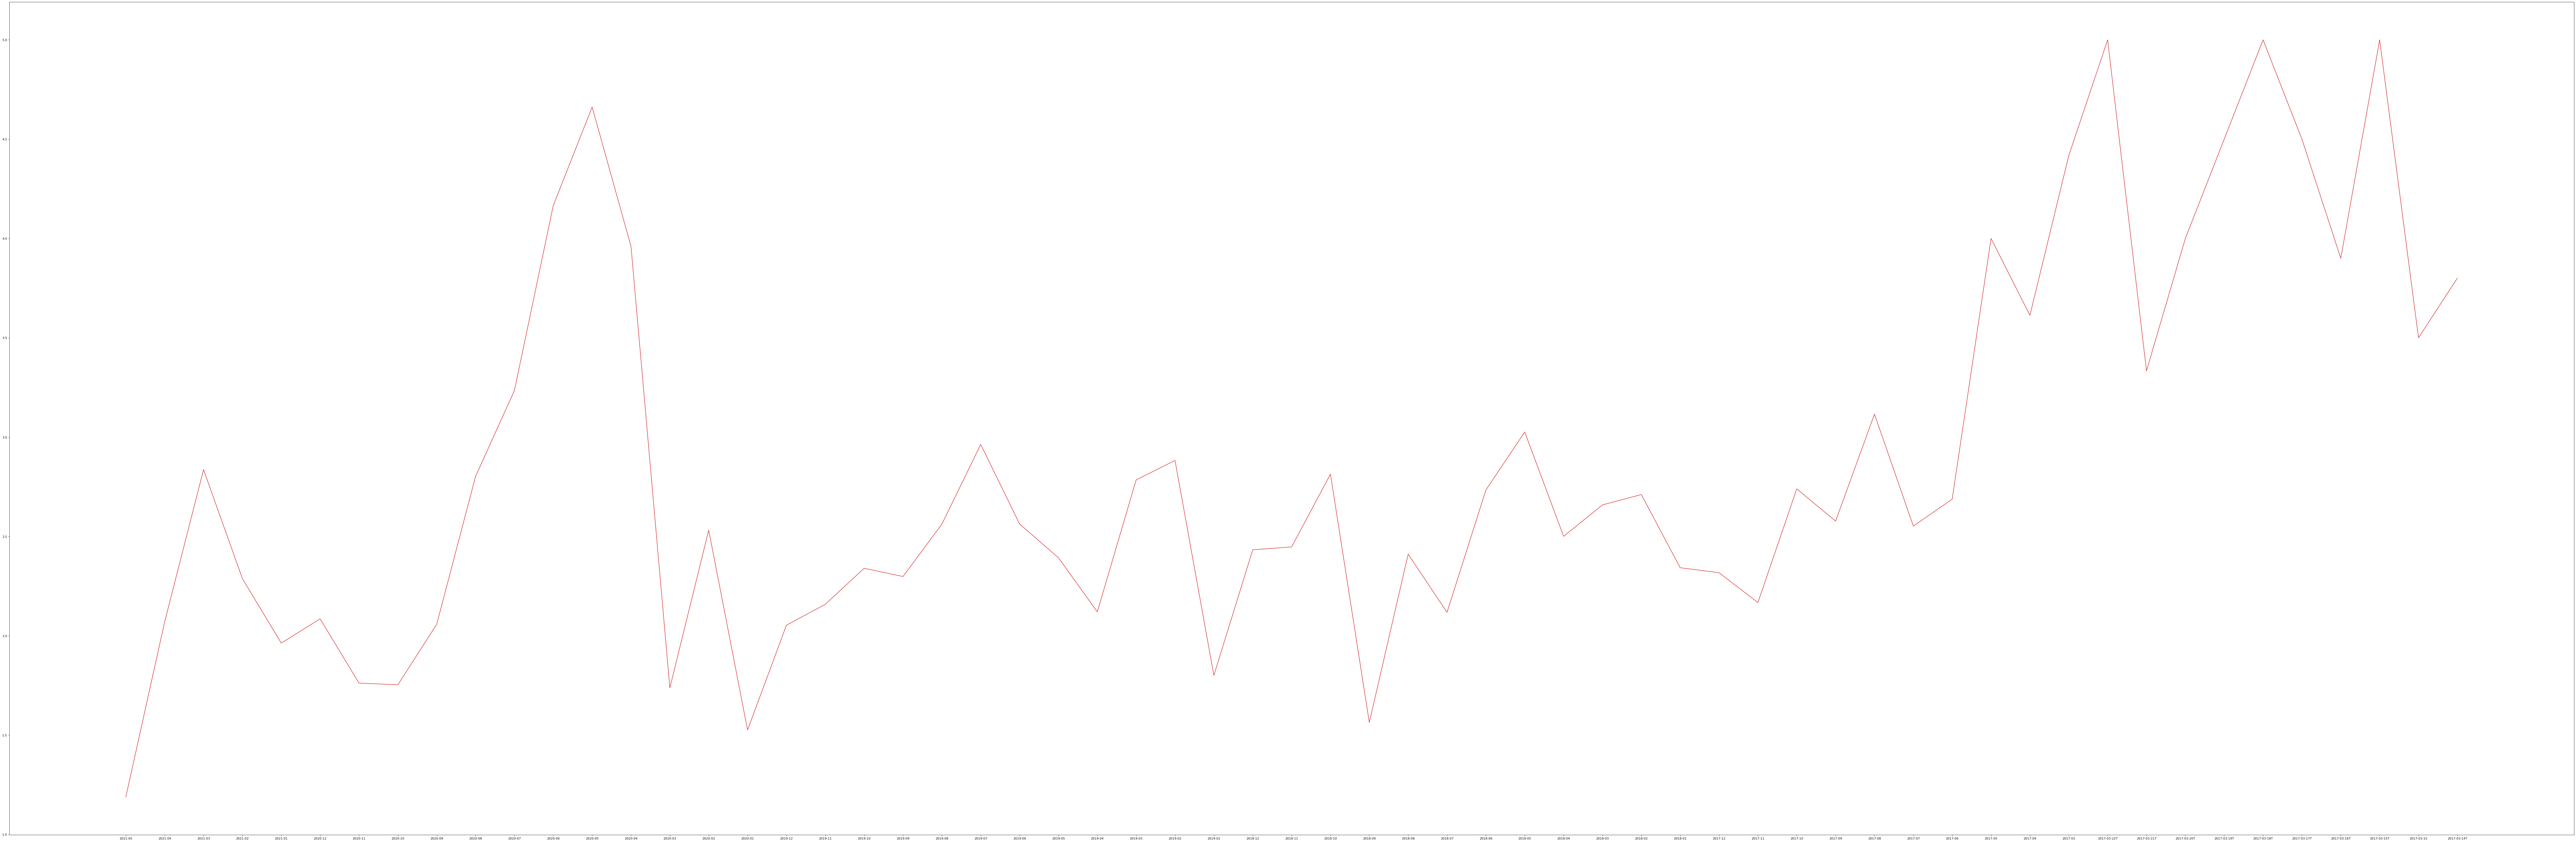

In [204]:
# plot first figuure of the data - can see that the date is actually in a decending order as you progress down the x axis.
# also the earlier elements of the data still have unstripped characters causing them not to have merged as they should.
plt.figure(figsize=(150,50), dpi= 80)
plt.plot('Date', 'Rating', data=df3, color='tab:red')

In [193]:
# removing the problem dates from the dataset and leaving the earliest element as the first non-contaminated.
df4 = df3.iloc[0:51, 0:2]
df4.head()

# reversing the order of the dataframe to display the dates in chronological order.
df5 = df4.iloc[::-1]
df5.head()

,Date,Rating
50,2017-03,4.417266
49,2017-04,3.612903
48,2017-05,4.000000
47,2017-06,2.687500
46,2017-07,2.551724


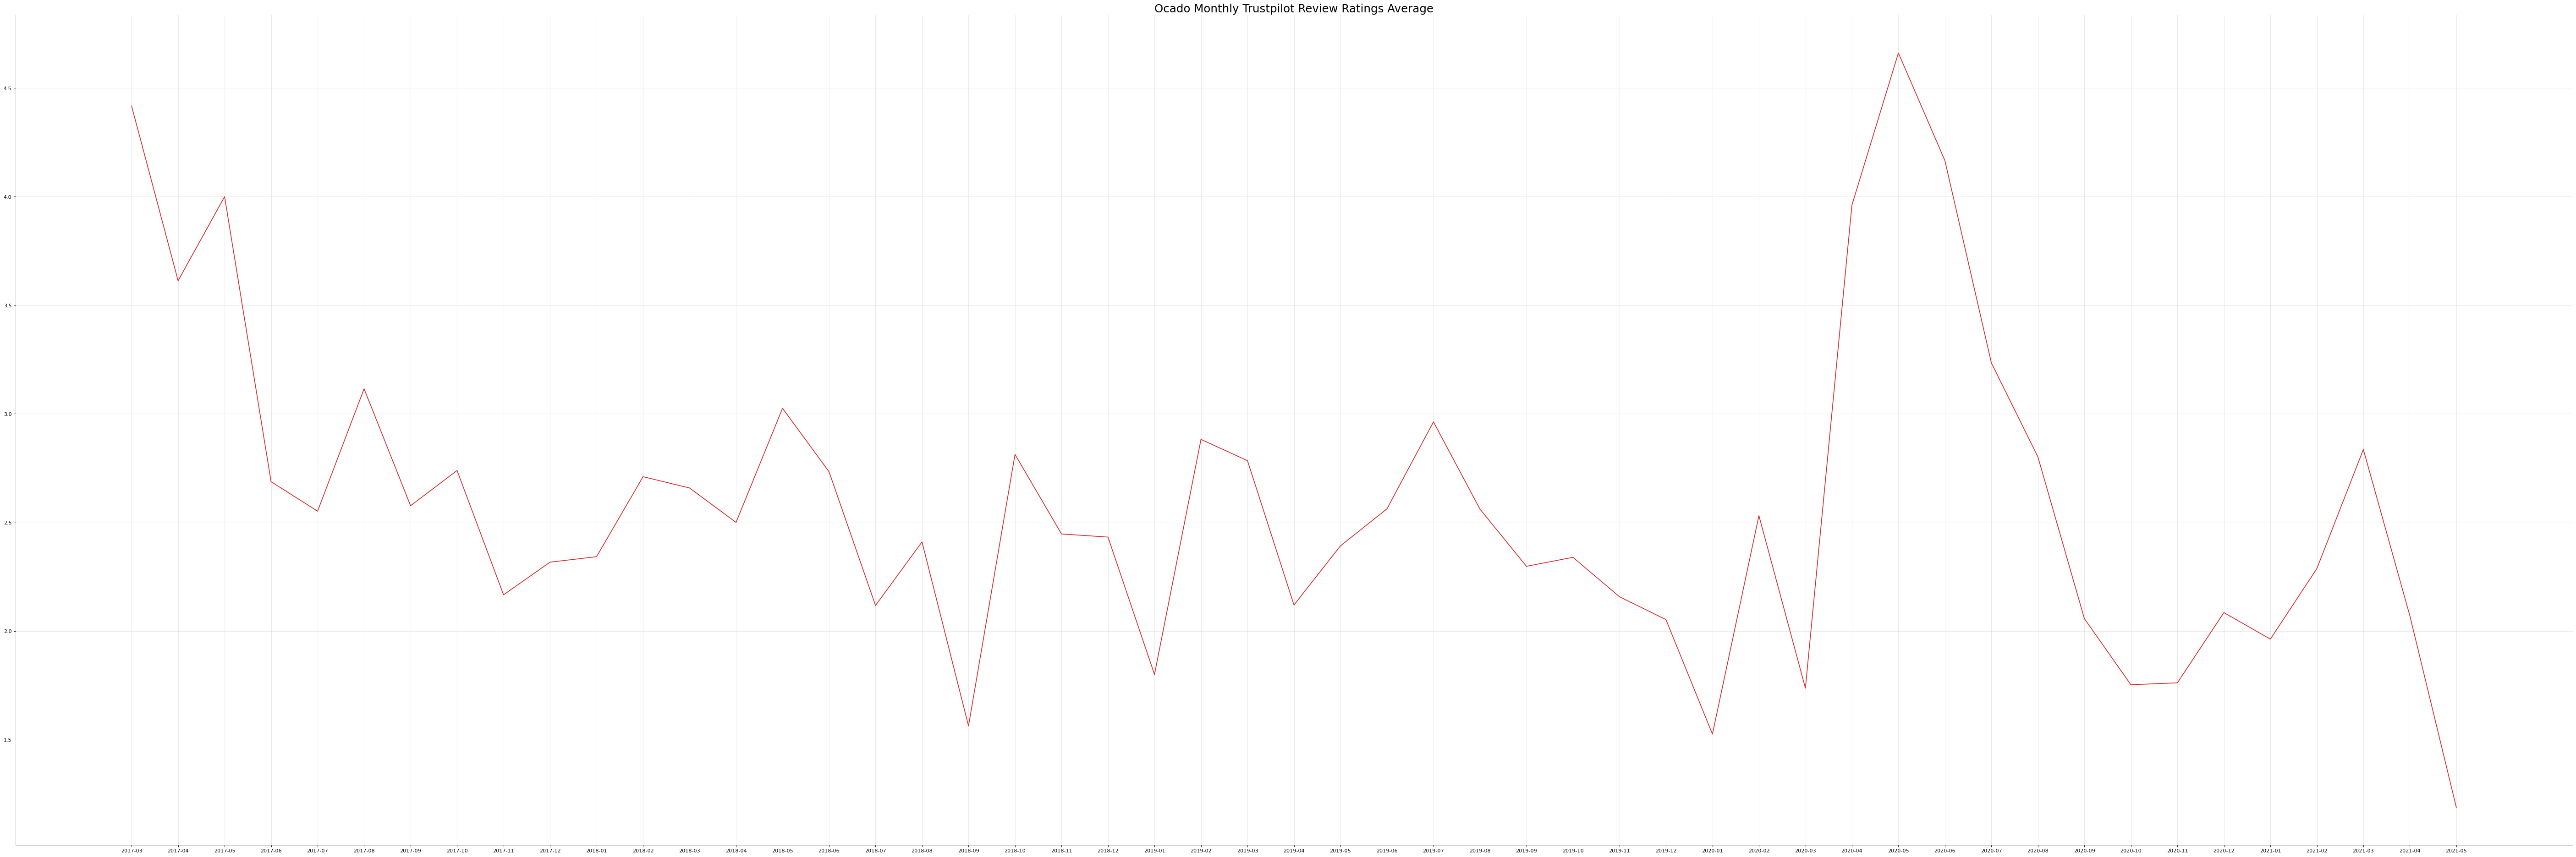

In [194]:
# plotting new chronologically correct dataset in a cleaner graph. 
# can clearly see the decrease in average reviews left on the site on a given month, anomaly around June 2020, however.
plt.figure(figsize=(90,30), dpi= 80)
plt.plot('Date', 'Rating', data=df5, color='tab:red')
plt.title("Ocado Monthly Trustpilot Review Ratings Average", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()